In [13]:
matplotlib.use('Agg')
#matplotlib.rc('font', family="D2Coding")
# [f.fname for f in matplotlib.font_manager.fontManager.ttflist]
font_location = 'C:\\Users\\62190\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf' # ex - 또는 ./utils/NanumBarunGothic.ttf
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

In [5]:
import matplotlib
import matplotlib.font_manager as fm

matplotlib.use('Agg')
#matplotlib.rc('font', family="D2Coding")
# [f.fname for f in matplotlib.font_manager.fontManager.ttflist]
font_location = 'C:\\Users\\62190\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf' # ex - 또는 ./utils/NanumBarunGothic.ttf
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)



from patsy import *
# 경고 무시
import warnings
warnings.simplefilter('ignore')

# 자주 사용하는 패키지를 임포트
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk
import pgmpy
import scipy.stats

# matplotlib 설정
mpl.use('Agg')

# seaborn 설정
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

%matplotlib inline

# 이미지 필터링

이미지 필터링은 여러 수식을 이용하여 이미지를 이루고 있는 픽셀 행렬을 다른 값으로 바꾸어 이미지를 변형하는 것을 말한다. 

## 임계처리

임계처리(thresholding)는 이미지 행렬에서 하나의 픽셀값을 사용자가 지정한 기준값(threshold)를 사용하여 이진화(binarization)하는 가장 단순한 필터다. OpenCV에서는 `threshold`라는 함수로 구현되어 있다. 인수는 다음과 같다. 

* `threshold(src, thresh, maxval, type)` 
  * `src` : 그레이 스케일 이미지
  * `thresh` : 기준값
  * `maxval` : 기준값을 넘었을 때 적용할 최대값
  * `type` : 임계처리 유형 
    * `THRESH_BINARY` : 기준값을 넘으면 최대값 아니면 0
    * `THRESH_BINARY_INV` : 기준값을 넘으면 0 아니면 최대값
    * `THRESH_TRUNC` : 기준값을 넘으면 기준값 아니면 최대값
    * `THRESH_TOZERO` : 기준값을 넘으면 원래값 아니면 0
    * `THRESH_TOZERO_INV` : 기준값을 넘으면 0 아니면 원래값
  

각 임계유형의 결과를 시각화하면 다음과 같다.

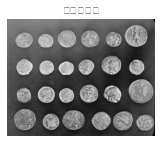

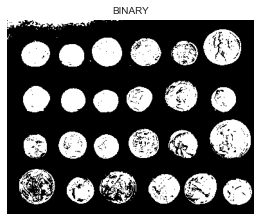

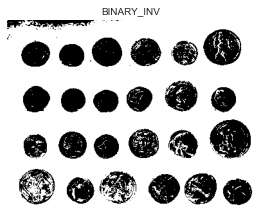

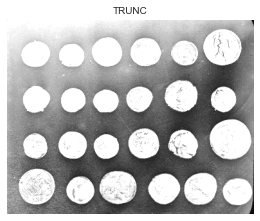

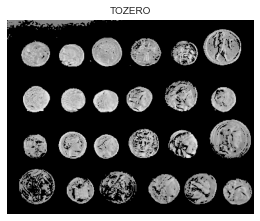

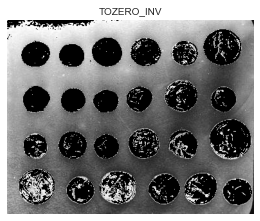

<Figure size 1080x1080 with 0 Axes>

In [11]:
import cv2
from skimage.data import coins

img = coins()

maxval = 255
thresh = maxval / 2

_, thresh1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO_INV)

titles = ['원본이미지', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(9, 5))
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontdict={'fontsize': 10})
    plt.axis('off')
    plt.figure(
    figsize=(15,15))

plt.tight_layout(pad=0.7)
plt.show()

## 적응임계처리

임계처리의 경우는 이미지 전체에 하나의 기준값을 적용한다. 적응임계처리는 일정한 영역 내의 이웃한 픽셀들의 값들을 이용하여 해당 영역에 적용할 기준값을 자체적으로 계산한다. OpenCV에서는 `adaptiveThreshold` 함수로 구현되어 있다. 

* `adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)` 
  * `src` : 그레이스케일 이미지
  * `maxValue` – 기준값을 넘었을 때 적용할 값
  * `adaptiveMethod` : 영역 내에서 기준값을 계산하는 방법. 
    * `ADAPTIVE_THRESH_MEAN_C`: 영역 내의 평균값에 C를 뺀 값을 기준값으로 사용
    * `ADAPTIVE_THRESH_GAUSSIAN_C`: 영역에 추후 설명할 가우시안 블러를 적용한 후 C를 뺀 값을 기준값으로 사용
  * `thresholdType` : 임계처리 유형
    * `THRESH_BINARY`
    * `THRESH_BINARY_INV`
  * `blockSize` : 임계처리를 적용할 영역의 크기
  * `C` : 평균이나 가중평균에서 차감할 값


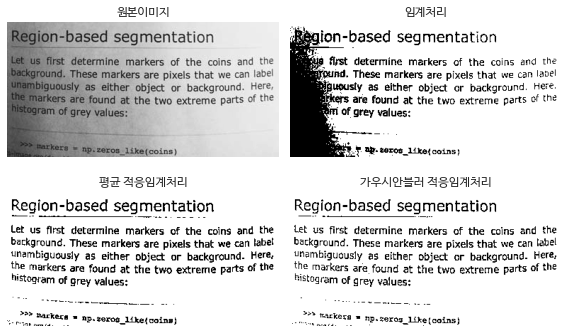

In [14]:
from skimage.data import page

img = page()

maxval = 255
thresh = 126
ret, th1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)

k = 15
C = 20

th2 = cv2.adaptiveThreshold(
    img, maxval, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, k, C)
th3 = cv2.adaptiveThreshold(
    img, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, k, C)

images = [img, th1, th2, th3]
titles = ['원본이미지', '임계처리', '평균 적응임계처리', '가우시안블러 적응임계처리']

plt.figure(figsize=(8, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

## 이미지 필터링

이미지 필터링(image filtering)은 필터(filter) 또는 커널(kernel) 또는 윈도우(window)라고 하는 정방행렬을 정의하고 이 커널을 이동시키면서 같은 이미지 영역과 곱하여 그 결과값을 이미지의 해당 위치의 값으로 하는 새로운 이미지를 만드는 연산이다. 기호 $\otimes$로 표기한다.

원본 이미지의 $(x,y)$ 위치의 명도를 $f(x,y)$, 필터 이미지를 $h(x,y)$, 필터링된 결과를 $g(x,y)$라고 하면 수식으로 다음과 같다.

$$ f \otimes h = \sum_{u=-K/2}^{K/2} \sum_{v=-K/2}^{K/2} f(x + u, y + v) \cdot h(u, v) $$

이 식에서 $K$는 필터 크기의 절반을 뜻한다. 예를 들어 $3\times 3$ 크기의 필터에서는 $K=1$이다. 위 식을 줄여서 다음처럼 나타내기도 한다. $W$S는 윈도우 영역을 뜻한다.

$$ f \otimes h = \sum_{W} f(x + u, y + v) \cdot h(u, v) $$

위 식에서 필터를 좌우 상하로 뒤집으면 콘볼루션(convolution)이라고 한다. 기호 $*$로 표기한다.


$$ f * h = f \otimes \tilde{h} = \sum_{W} f(x - u, y - v) \cdot \tilde{h}(u, v) $$

$$ \tilde{h}(u, v) = h(-u, -v) $$

<img src="https://datascienceschool.net/upfiles/0742fffa9e614cd78a8cba4ad08f0bc7.jpeg" width="100%">

그림 38.2 : 윈도우 연산

openCV에서는 `filter2D` 함수를 사용한다


`filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])`

* `src`: 이미지
* `ddepth`: 이미지 깊이(자료형 크기). -1이면 입력과 동일
* `kernel`: 커널 행렬


다음 코드는 평균을 구하는 커널 적용한 예다. 커널 크기가 커지면서 이미지가 점점 더 흐려지는 것을 볼 수 있다. 

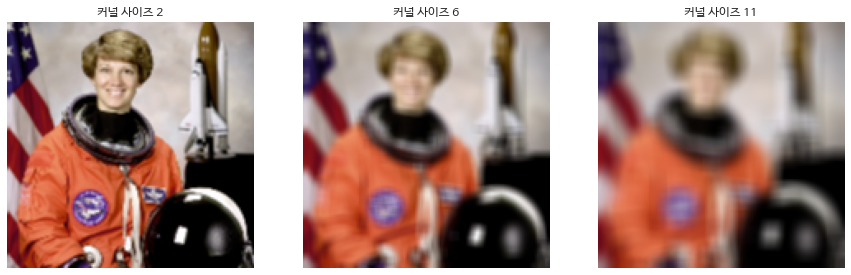

In [19]:
import cv2
from skimage.data import astronaut

img = astronaut()
img = cv2.resize(img, dsize=(150, 150))

plt.figure(figsize=(15, 15))
for i, k in enumerate([2, 6, 11]):
    kernel = np.ones((k, k)) / k**2
    filtering = cv2.filter2D(img, -1, kernel)
    plt.subplot(1, 3, i + 1)
    plt.imshow(filtering)
    plt.title("커널 사이즈 {}".format(k))
    plt.axis("off")

plt.show()

## 블러

블러는 이미지 필터링을 사용하여 이미지를 흐리게 만드는 것을 말한다. 노이즈를 제거하거나 경계선을 흐리게 하기 위해 쓴다. 다음과 같은 방법이 있다.

* 평균 블러
* 중앙값 블러
* 가우시안 블러
* 양방향 블러

### 평균 블러

평균 블러 방법은 균일한 값을 가지는 커널을 이용한 이미지 필터링이다. 따라서 커널 영역내의 평균값으로 해당 픽셀을 대체한다. OpenCV에서는 `blur` 함수로 구현되어 있다.

`blur(src, ksize)`

* `src`: 원본 이미지
* `ksize`: 커널 크기

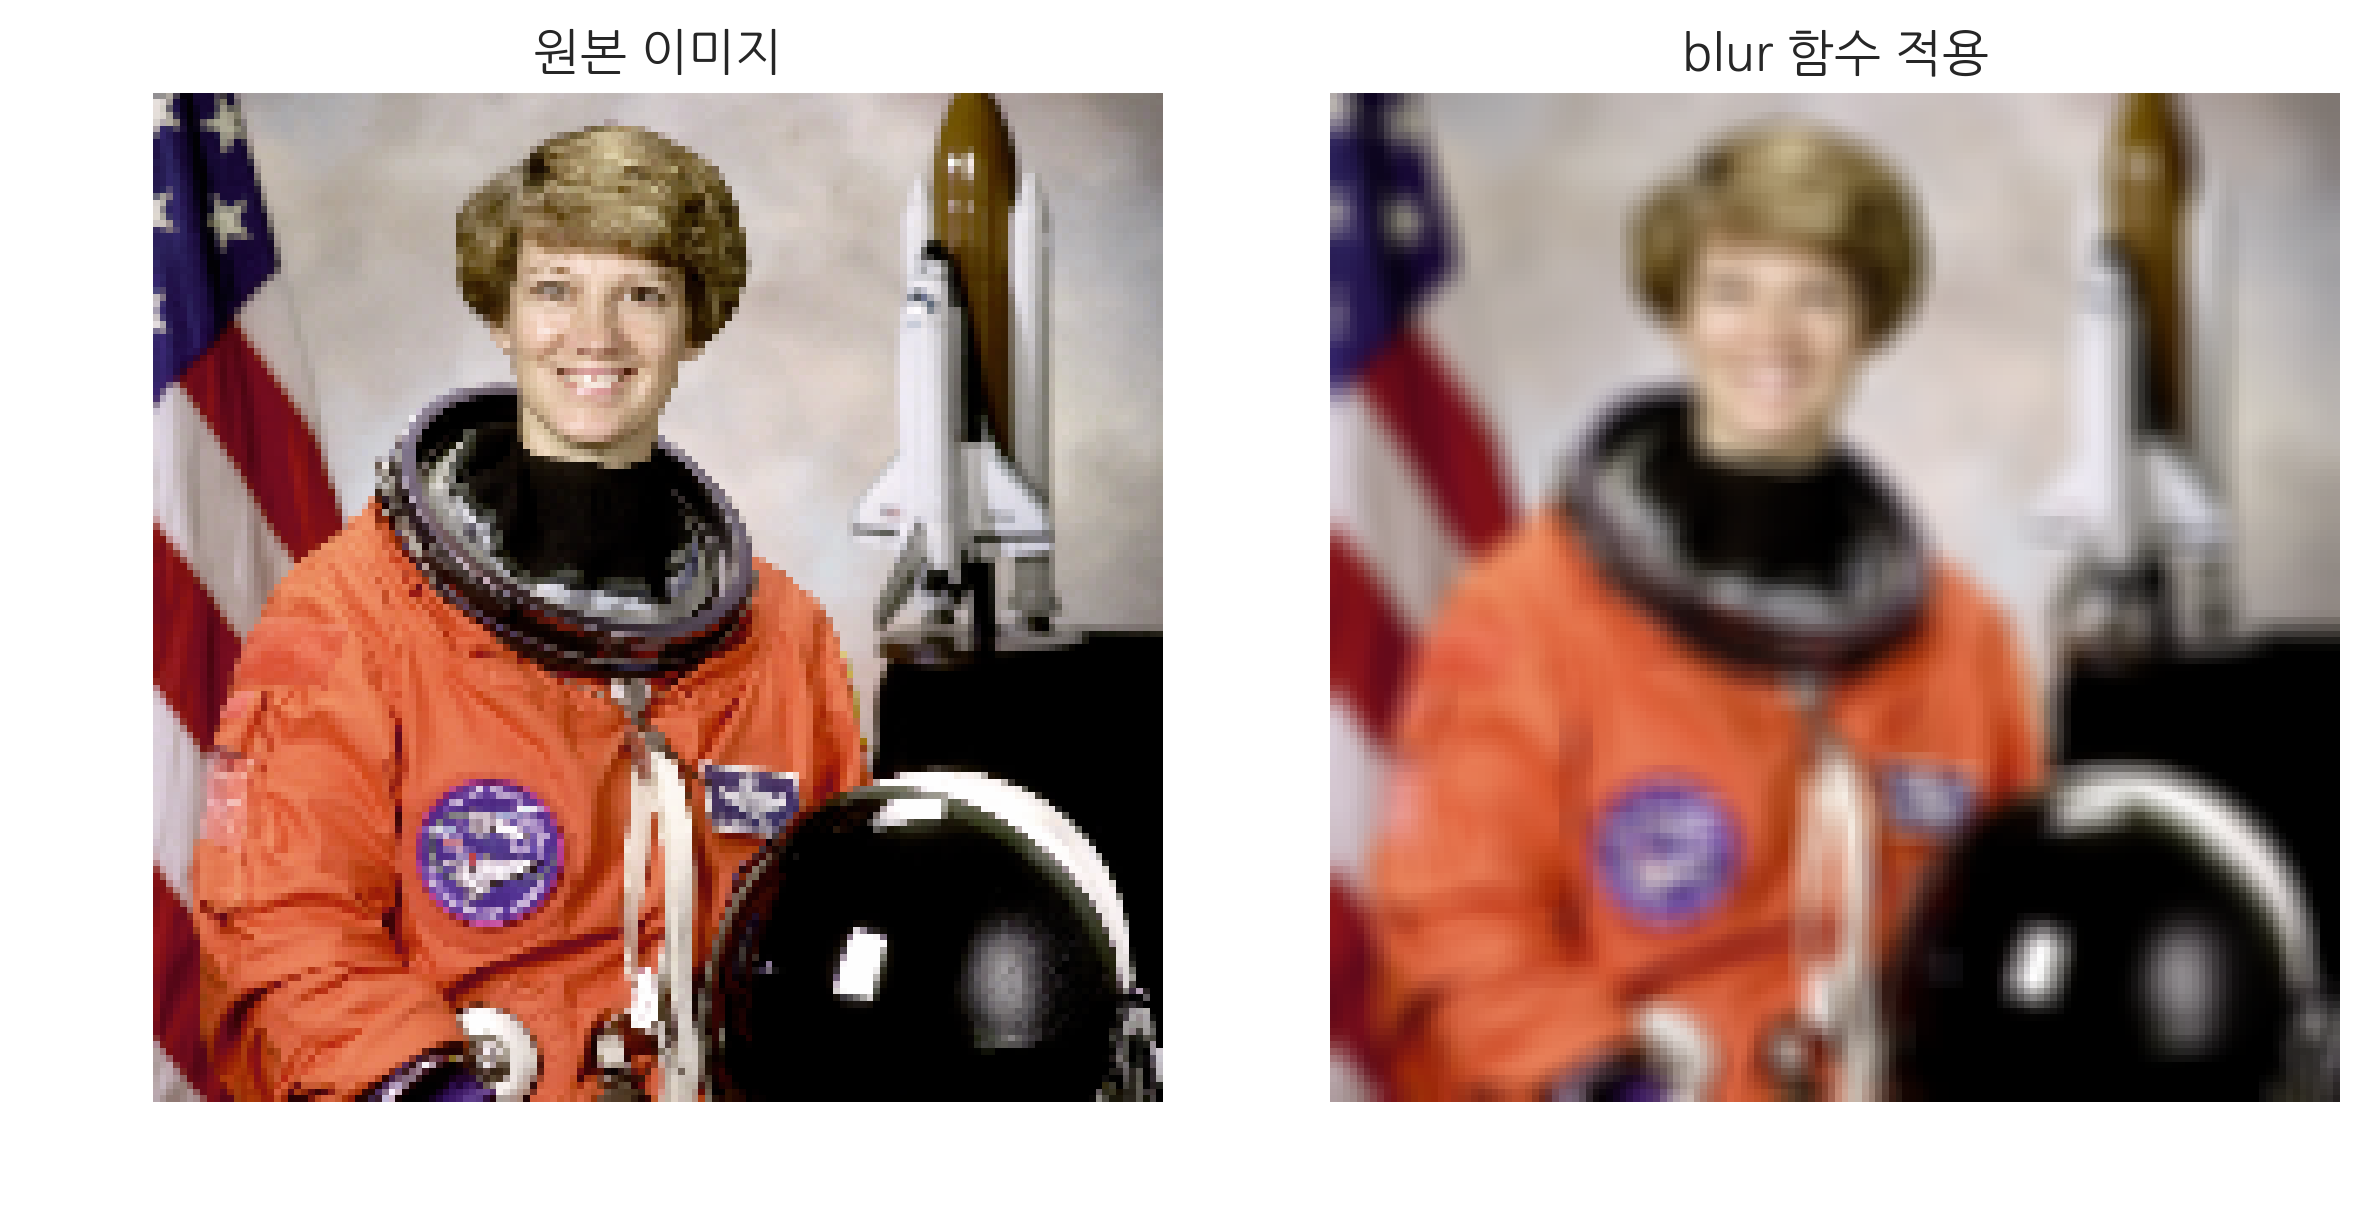

In [4]:
blur = cv2.blur(img, (5, 5))
boxfilter = cv2.boxFilter(img, -1, (5, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("원본 이미지")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(blur)
plt.title("blur 함수 적용")
plt.axis('off')

plt.tight_layout()
plt.show()

### 중앙값 블러 

중앙값 블러는 평균이 아닌 중앙값으로 해당 픽셀을 대체한다. 이 필터링 방법은 점 모양의 잡음을 제거하는데 효과적이다. OpenCV에서는 `medianBlur` 함수를 사용한다.

`medianBlur(src, ksize)`

* `src`: 원본 이미지
* `ksize`: 커널 크기

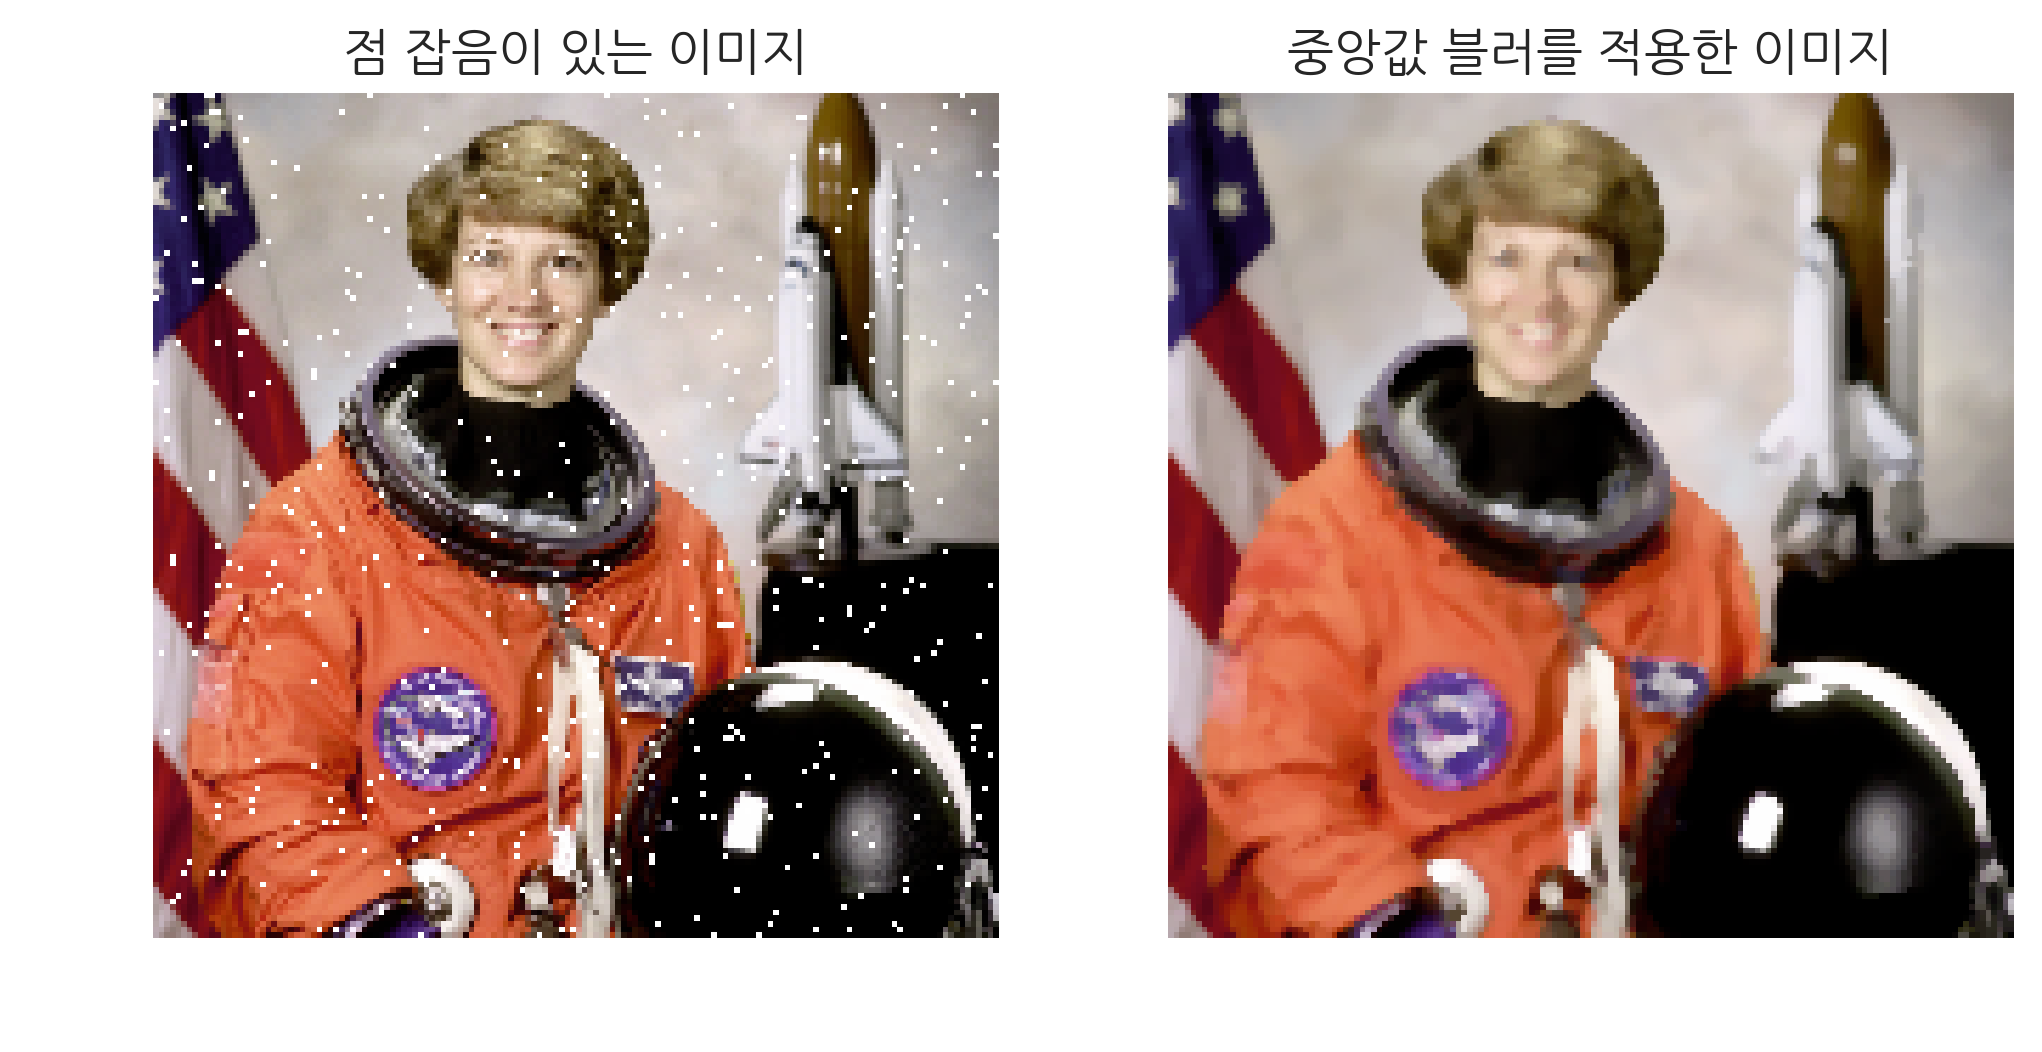

In [5]:

# 점 잡음 적용
img_noise = img.copy()

np.random.seed(0)
N = 500
idx1 = np.random.randint(img.shape[0], size=N)
idx2 = np.random.randint(img.shape[1], size=N)
img_noise[idx1, idx2] = 255

# 중앙값 블러로 잡음 제거
img_denoise = cv2.medianBlur(img_noise, 3)

plt.subplot(1, 2, 1)
plt.imshow(img_noise)
plt.title("점 잡음이 있는 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise)
plt.title("중앙값 블러를 적용한 이미지")
plt.axis('off')
plt.show()

### 가우시안 블러

가우시안 블러는  가우시안 함수 $G$를 커널로 사용한다. 가우시안 커널은 중앙 위치 $(x,y)$와 커널 위치 $(x+u, y+v)$의 거리 차이 $(u,v)$가 클수록 가중치가 작아진다. 

$$ f \otimes G = \sum_{W} f(x + u, y + v) \cdot G(u, v) = \sum_{W} f(x + u, y + v) \cdot G((x+u)-x, (y+v)-y) $$


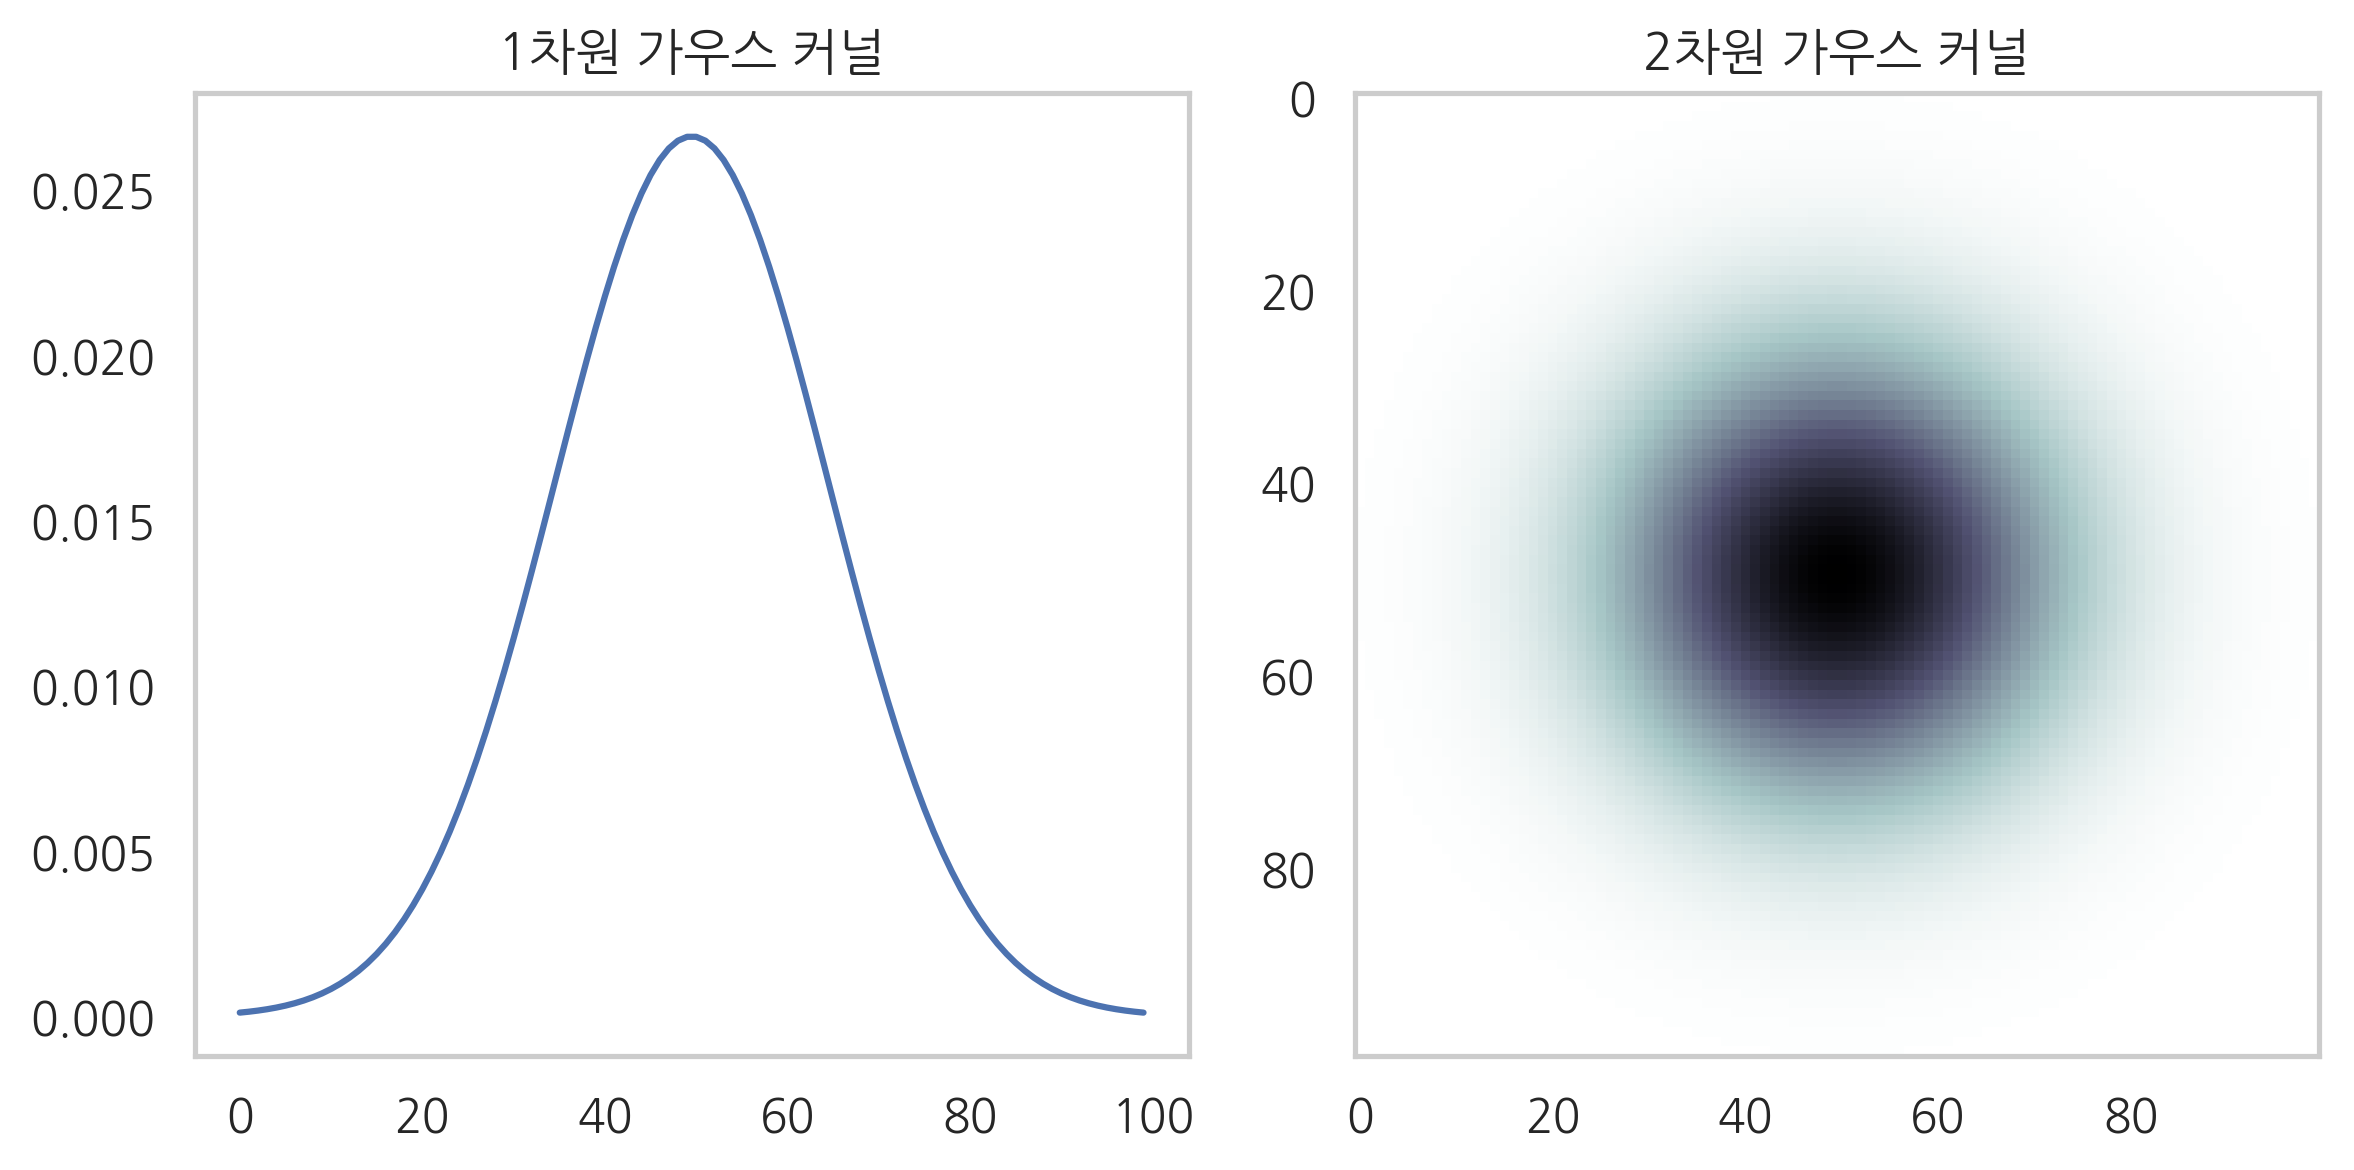

In [6]:
gauss1d = cv2.getGaussianKernel(100, 15)
gauss2d = gauss1d @ gauss1d.T

plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.plot(gauss1d)
plt.grid(False)
plt.title("1차원 가우스 커널")

plt.subplot(122)
plt.imshow(gauss2d, cmap=mpl.cm.bone_r)
plt.grid(False)
plt.title("2차원 가우스 커널")

plt.tight_layout()
plt.show()

OpenCV에서는 `GaussianBlur` 함수로 구현되어 있다.

`GaussianBlur(src, ksize, sigmaX)`

* `src`: 원본 이미지
* `ksize`: 커널 크기
* `sigmaX`: 표준편차


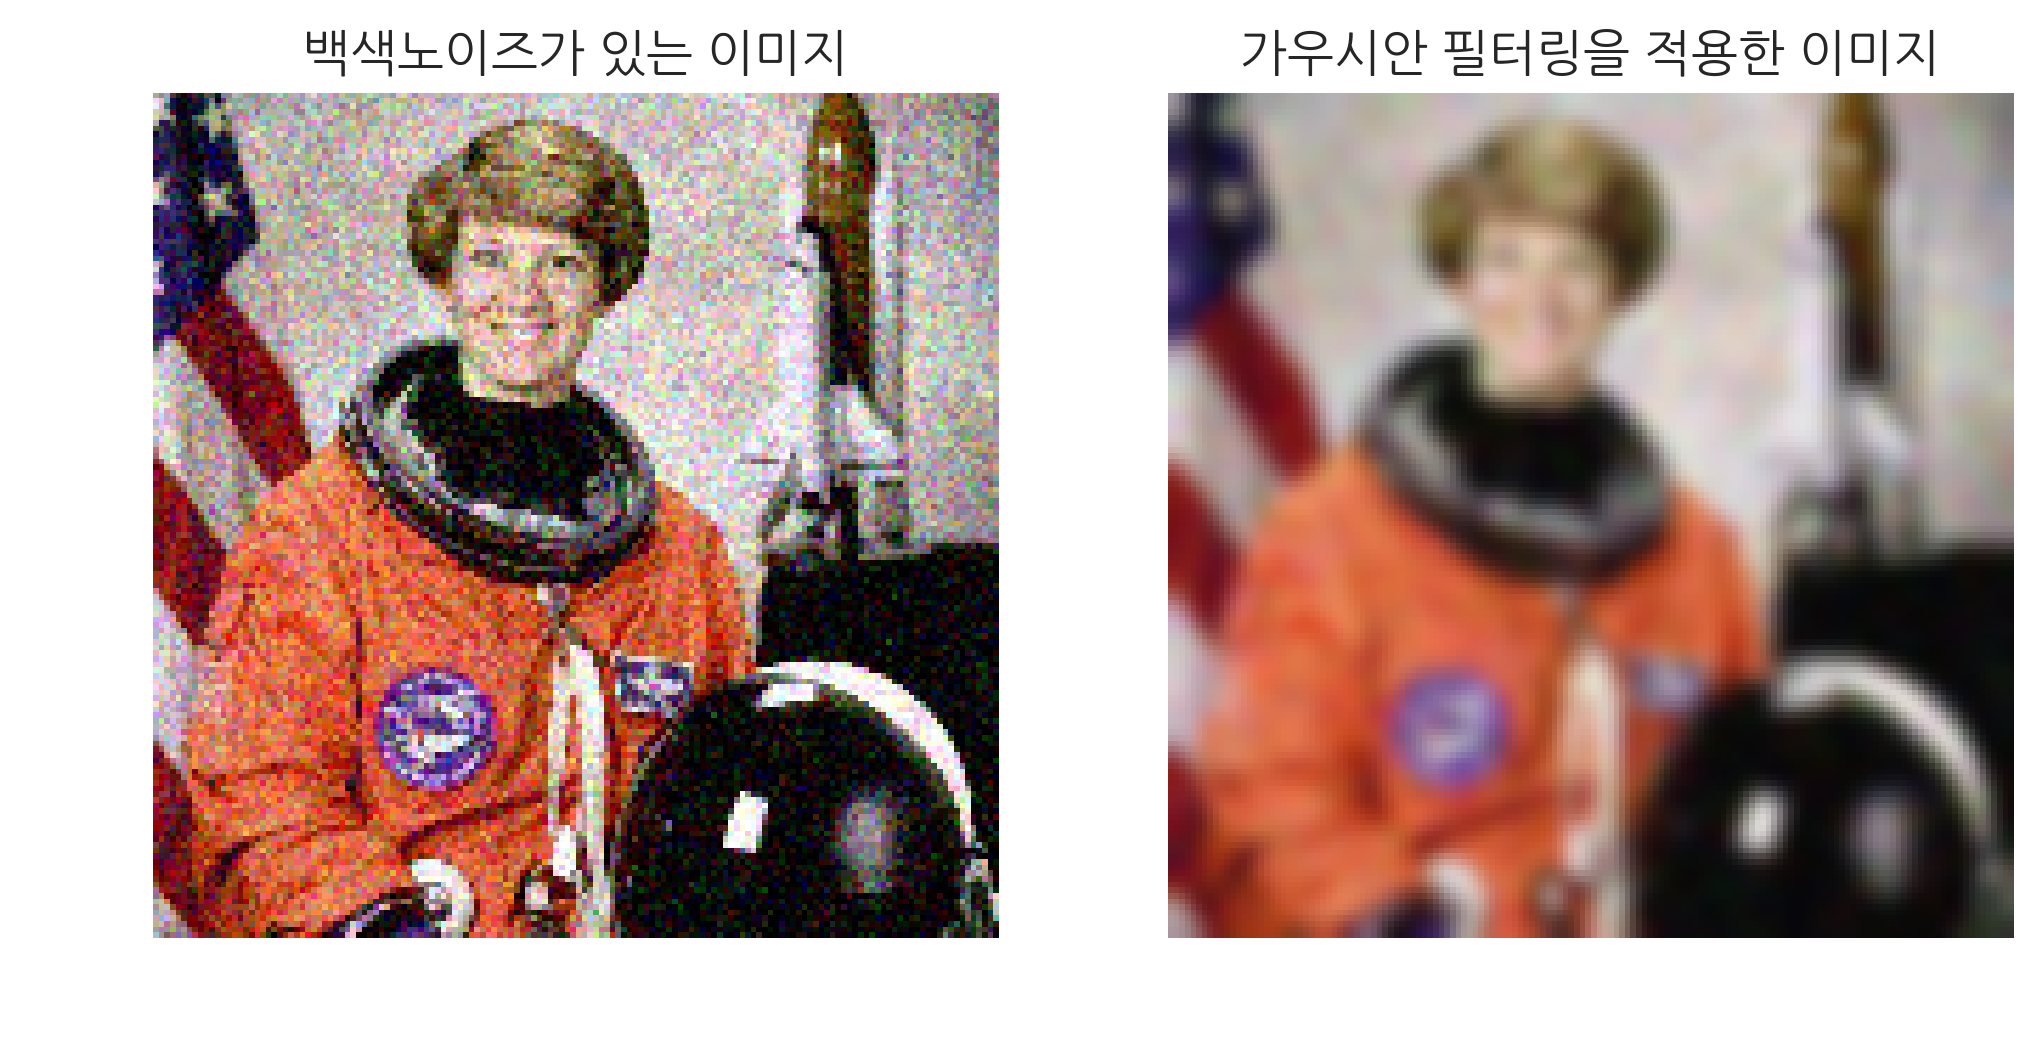

In [7]:
# 백색 잡음
img_noise = np.clip((img / 255 + np.random.normal(scale=0.1, size=img.shape)) * 255, 0, 255).astype('uint8')

# 가우시안 블러로 잡음 제거
img_denoise = cv2.GaussianBlur(img_noise, (9, 9), 2)

plt.subplot(1, 2, 1)
plt.imshow(img_noise)
plt.title("백색노이즈가 있는 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise)
plt.title("가우시안 필터링을 적용한 이미지")
plt.axis('off')

plt.show()

### 양방향 필터링

가우시안 필터링을 쓰면 이미지의 경계선도 흐려진다. 양방향 필터링(Bilateral Filtering)은 두 픽셀과의 거리 뿐 아니라 두 픽셀의 명암값의 차이도 커널에 넣어서 가중치로 곱한다. 

* 일반 이미지 필터링

$$ f \otimes G = \sum_{W} f(x + u, y + v) \cdot G((x+u)-x, (y+v)-y) $$

* 양방향 이미지 필터링

$$ f \otimes G = \sum_{W} f(x + u, y + v) \cdot G((x+u)-x, (y+v)-y) \cdot G'(f(x+u)-f(x), f(y+v)-f(y)) $$


따라서 픽셀값의 차이가 너무 크면 가중치가 0에 가까운 값이 되어 합쳐지지 않으므로 영역과 영역사이의 경계선이 잘 보존된다.

OpenCV에서는 `bilateralFilter` 함수로 구현되어 있다.


`bilateralFilter(src, d, sigmaColor, sigmaSpace)`

* `src`: 원본 이미지
* `d`: 커널 크기
* `sigmaColor`: 색공간 표준편차. 값이 크면 색이 많이 달라도 픽셀들이 서로 영향을 미친다.
* `sigmaSpace`: 거리공간 표준편차. 값이 크면 멀리 떨어져있는 픽셀들이 서로 영향을 미친다.

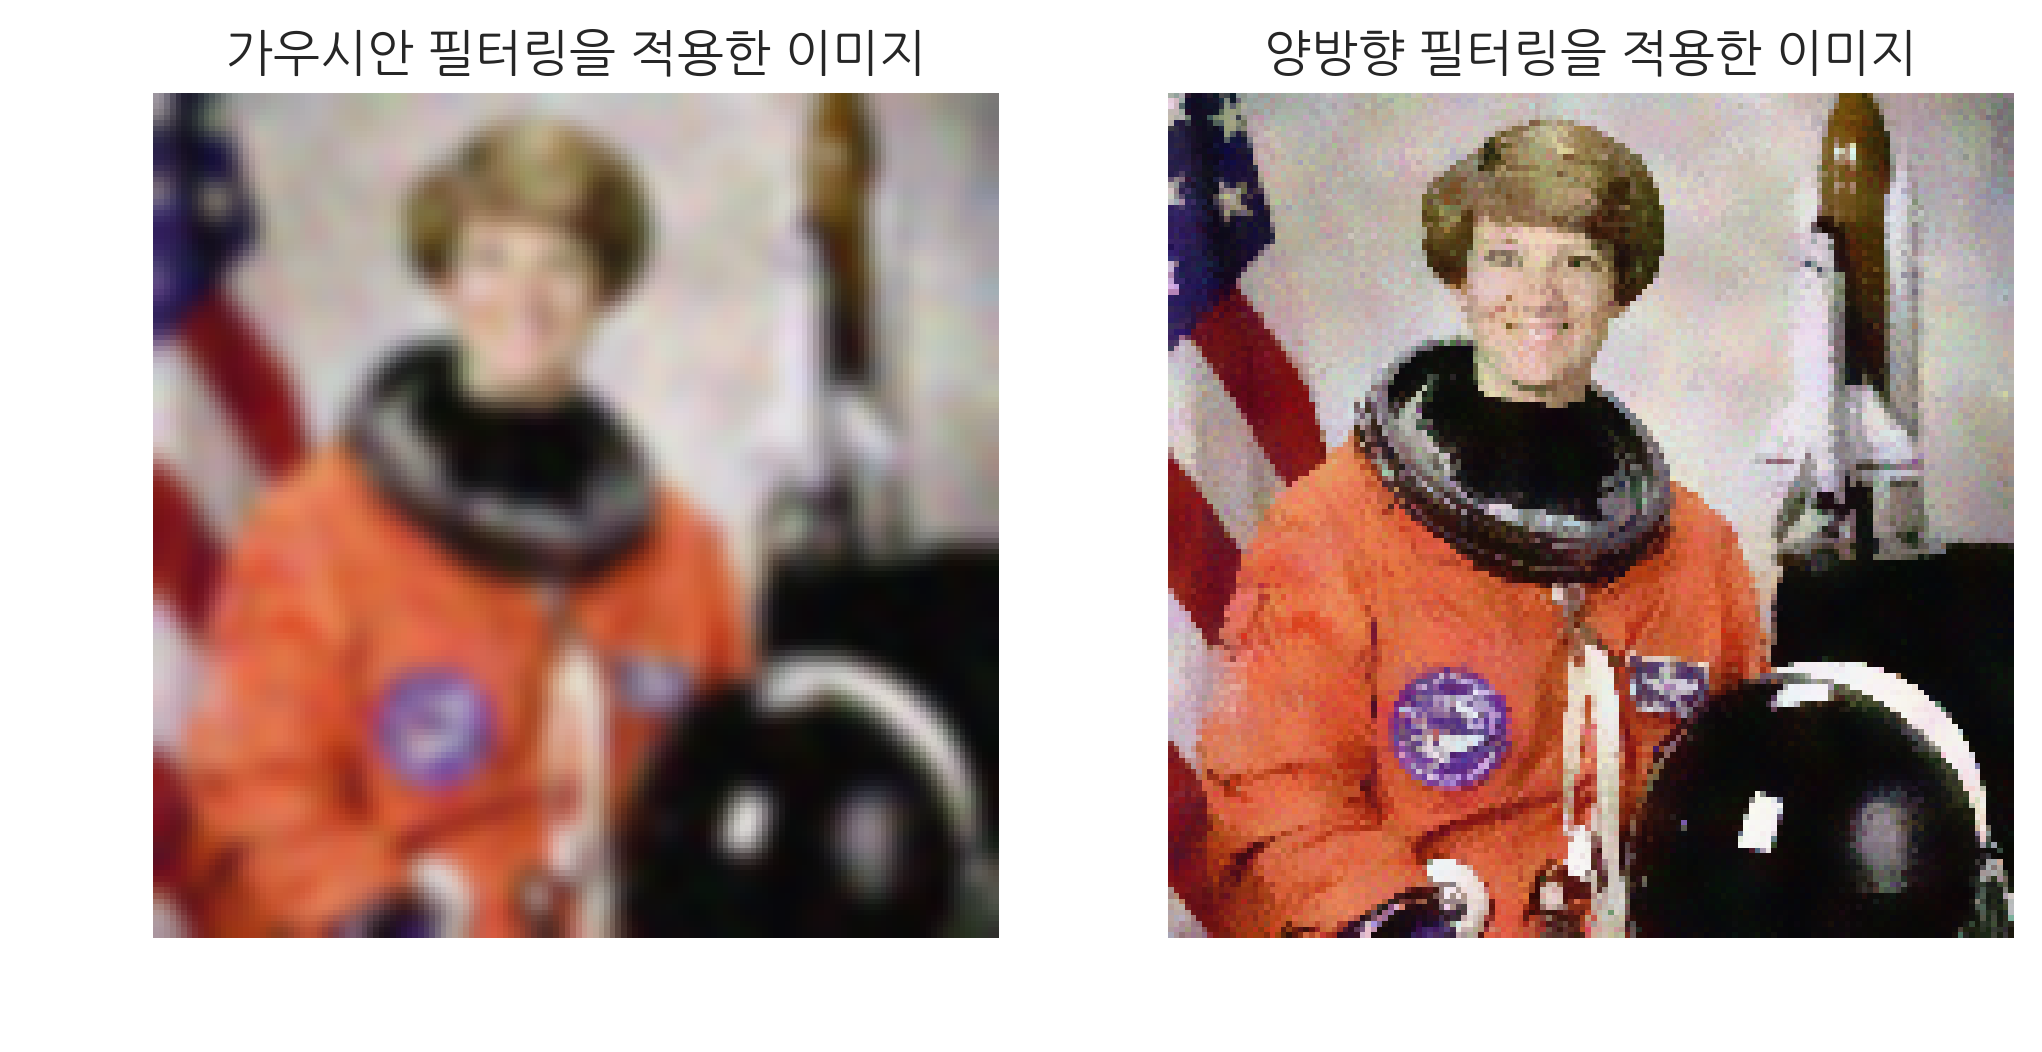

In [8]:
img_denoise1 = cv2.GaussianBlur(img_noise, (9, 9), 2)
img_denoise2 = cv2.bilateralFilter(img_noise, 9, 75, 75)

plt.subplot(1, 2, 1)
plt.imshow(img_denoise1)
plt.title("가우시안 필터링을 적용한 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise2)
plt.title("양방향 필터링을 적용한 이미지")
plt.axis('off')

plt.show()

## 형태학적 변환 

이진화한 이미지에서는 같은 값을 가진 픽셀이 이웃하여 있으면 이를 형태학적 영역(morphological region)으로 생각할 수 있다.
이미지의 형태학적 변환(morphological transformation)은 이미지 필터링을 사용하여 영역을 변화시키는 방법이다.

변환에 적용할 커널은 `getStructuringElement` 함수로 생성한다. 

`getStructuringElement(shape, ksize)`

* `shape`: 커널 모양
  * `cv2.MORPH_RECT`: 사각형 
  * `cv2.MORPH_ELLIPSE`: 타원형 
  * `cv2.TMORPH_CROSS`: 십자
* `ksize`: 커널 크기

In [21]:
cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [22]:
cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [23]:
cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

### 침식 기법

침식 기법은 각 픽셀에 커널을 적용하여 커널 영역 내의 최솟값으로 해당 픽셀을 대체한다. 이진화된 이미지에서는 0인 영역이 증가한다. 

OpenCV에서는 `erode`함수로 구현되어 있다. 

`erode(src, kernel)`

* `src`: 원본 이미지
* `kernel`: 커널


다음 코드는 이미지를 여러 커널 모양을 이용하여 침식 기법으로 변환한다. 검은색이 0인 영역, 흰색이 1인 영역이다. 검은색(0)이 흰색을 침식해 들어가는 것을 알 수 있다.

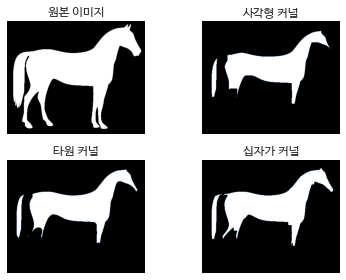

In [24]:
from skimage.data import horse

img = horse().astype('uint8')
img = np.ones(img.shape) - img

ksize = (20, 20)
kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT, ksize)
kernel[1] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize)
kernel[2] = cv2.getStructuringElement(cv2.MORPH_CROSS, ksize)
title = ["사각형 커널", "타원 커널", "십자가 커널"]

plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("원본 이미지")
plt.axis('off')
for i in range(3):
    erosion = cv2.erode(img, kernel[i])
    plt.subplot(2, 2, i+2)
    plt.imshow(erosion, cmap='bone')
    plt.title(title[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

### 팽창

팽창(Dilation)은 침식과 반대로 커널 영역내의 최댓값으로 해당 픽셀을 대체하는 것이다. OpenCV에서는  `dilate` 함수로 구현되어 있다.


`dilate(src, kernel)`

* `src`: 원본 이미지
* `kernel`: 커널


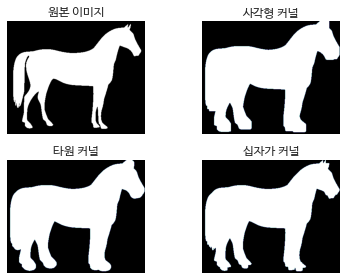

In [25]:
plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("원본 이미지")
plt.axis('off')
for i in range(3):
    erosion = cv2.dilate(img, kernel[i])
    plt.subplot(2, 2, i+2)
    plt.imshow(erosion, cmap='bone')
    plt.title(title[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

### 그레디언트, 오프닝, 클로징

그레디언트는 팽창으로 확장시킨 영역에서 침식으로 축소시킨 영역을 빼서 윤곽선을 파악하는 것이다. 

이와 유사한 기법으로 오프닝(Opening)과 클로징(Closing)이 있다. 오프닝은 침식을 적용한 뒤 팽창을 적용하는 것으로 영역이 점점 둥글게 되므로 점 잡음, 작은 물체, 돌기 등을 제거하는데 적합하다. 클로징은 반대로 팽창을 적용한 뒤 침식을 적용하여 영역이 영역이 붙기 때문에 전체적인 윤곽을 파악하는데 적합하다.

그레디언트를 구하려면 OpenCV의 `morphologyEx` 라는 함수를 사용한다. 

`morphologyEx(src, op, kernel)`

* `src`: 원본 이미지
* `op`: 
  * `cv2.MORPH_OPEN`: `cv2.dilate(cv2.erode(image))`
  * `cv2.MORPH_CLOSE`: `cv2.erode(cv2.dilate(image))`
  * `cv2.MORPH_GRADIENT`: `cv2.dilate(image) - cv2.erode(image)`
  * `cv2.MORPH_TOPHAT`: `image - opening(image)`
  * `cv2.MORPH_BLACKHAT`: `image - closing(image)`
* `kernel`: 커널


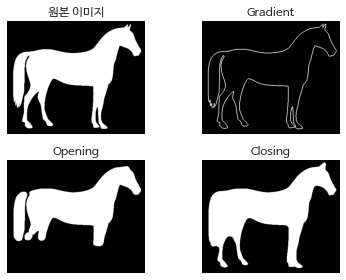

In [26]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
)

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
)

gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
)

images = [img, gradient, opening, closing]
titles = ["원본 이미지", 'Gradient', 'Opening', 'Closing']

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

#### 연습 문제 1

다음 왼쪽 이미지를 필터링 처리하여 오른쪽 이미지와 같이 종이 부분만을 이진화하여라.
이미지는 다음 명령으로 내려받는다.

```
!wget https://datascienceschool.net/upfiles/63a2990218f1487b8e0dfd4dac8f3a5e.png -O receipt.png
```

<img src="https://datascienceschool.net/upfiles/bf701e2bc70141478cafe3c9b2b9f032.png">

In [81]:
!wget https://datascienceschool.net/upfiles/63a2990218f1487b8e0dfd4dac8f3a5e.png -O receipt.png

--2020-08-16 16:39:48--  https://datascienceschool.net/upfiles/63a2990218f1487b8e0dfd4dac8f3a5e.png
Resolving datascienceschool.net... 114.202.2.86
Connecting to datascienceschool.net|114.202.2.86|:443... connected.
ERROR: cannot verify datascienceschool.net's certificate, issued by `/C=LV/L=Riga/O=GoGetSSL/CN=GoGetSSL RSA DV CA':
  Unable to locally verify the issuer's authority.
ERROR: certificate common name `www.datascienceschool.net' doesn't match requested host name `datascienceschool.net'.
To connect to datascienceschool.net insecurely, use `--no-check-certificate'.
Unable to establish SSL connection.


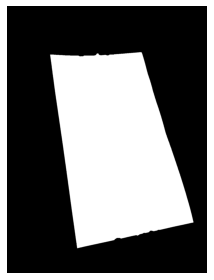

In [112]:
import cv2

maxval = 255
thresh = 198

img = cv2.imread("receipt2.png") # 이미지 불러오기
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 그레이톤으로 변환
_, img3 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY) # 쓰레쉬 홀드

# 중앙값 블러로 잡음 제거
img3 = cv2.morphologyEx(img3, cv2.MORPH_CLOSE, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
)

np.random.seed(0)
N = 500
idx1 = np.random.randint(img3.shape[0], size=N)
idx2 = np.random.randint(img3.shape[1], size=N)
img3[idx1, idx2] = 255

# 중앙값 블러로 잡음 제거
img3 = cv2.medianBlur(img3, 3)

plt.imshow(img3, cmap='gray')
plt.axis('off')
plt.tight_layout()